# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 109 (delta 42), reused 94 (delta 27), pack-reused 0
Receiving objects: 100% (109/109), 33.19 MiB | 19.38 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/machine_learning_1/perceptron_algorithm


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [7]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

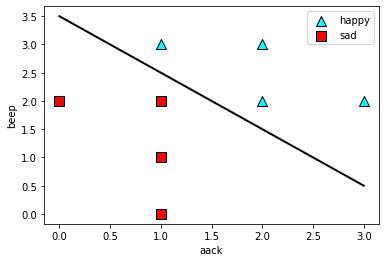

In [11]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [4]:
def step(x):
  ## TODO ##
  # implement step function
  output = 1 if x>=0 else 0
  return output

def score(weights, bias, features):
  ## TODO ##
  # implement score calculation
  output = np.dot(features, weights) + bias
  return output

def prediction(weights, bias, features):
  ## TODO ##
  # implement prediction calculation using step and score functions
  output = step(score(weights, bias, features))
  return output

def error(weights, bias, features, label):
  ## TODO ##
  # implement error calculation using prediction and score functions
  output = 0 if prediction(weights, bias, features) == label  else np.abs(score(weights, bias, features))
  return output

def mean_perceptron_error(weights, bias, features, labels):
  total_error = 0
  for i in range(len(features)):
    total_error += error(weights, bias, features[i], labels[i])
  return total_error/len(features)

In [32]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
  ## TODO ##
  # update the weights and bias using a single data sample
  weights += learning_rate*(label - prediction(weights, bias, features))*features
  bias += learning_rate*(label - prediction(weights, bias, features))
  return weights, bias

### Running the perceptron algorithm

In [33]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
  weights = [1.0 for i in range(len(features[0]))]
  bias = 0.0
  errors = []
  for epoch in range(epochs):
    # Coment the following line to draw only the final classifier
    utils.draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
    error = mean_perceptron_error(weights, bias, features, labels)
    errors.append(error)
    i = random.randint(0, len(features)-1)
    weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
  utils.draw_line(weights[0], weights[1], bias)
  utils.plot_points(features, labels)
  plt.ylim([-2, 5])
  plt.show()
  plt.scatter(range(epochs), errors)
  return weights, bias

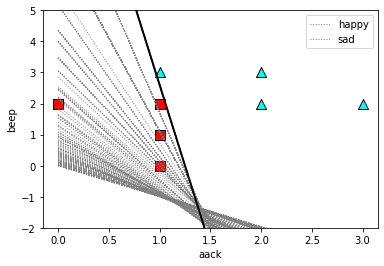

(array([0.52, 0.05]), -0.6500000000000004)

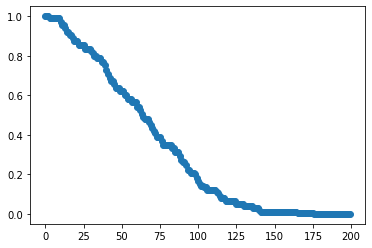

In [34]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [16]:
from sklearn.linear_model import Perceptron
## TODO ##
# Use SKlearn to train perceptron algorithm
clf = Perceptron()
clf.fit(features, labels)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
clf.score(features, labels)

1.0

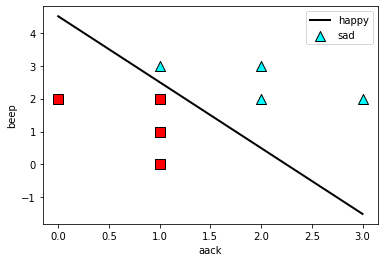

In [18]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()